# Clasificación de Hongos con Machine Learning y  Redes Neuronales MLP

## Librerias usadas con imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
# Integrantes
# Juan Sebastián Caicedo Orobio
# Santiago Giraldo Gutierrez
# Brayan Alexis Medina
# Juan Hurtado

Link donde se alojo la información para no tener que cargar el archivo:
https://raw.githubusercontent.com/Skpow1234/Dataset_Repo/refs/heads/main/data/mushroom_cleaned.csv

Leemos el dataset y renombramos las columnas cambiando estas a español, para luego mostrar las primeras 5 columnas del dataset y ver la estructura del mismo.

In [18]:
# Cargar el dataset limpio
url = 'https://raw.githubusercontent.com/Skpow1234/Dataset_Repo/refs/heads/main/data/mushroom_cleaned.csv'
mush = pd.read_csv(url)
mush.rename(columns={'cap-diameter': 'diámetro-sombrero','cap-shape': 'forma-sombrero','gill-attachment': 'fijación-lámina','gill-color': 'color-lámina','stem-height': 'altura-tallo',
    'stem-width': 'ancho-tallo','stem-color': 'color-tallo','season': 'temporada','class': 'clase'}, inplace=True)
mush.head()

,diámetro-sombrero,forma-sombrero,fijación-lámina,color-lámina,altura-tallo,ancho-tallo,color-tallo,temporada,clase
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


se asginan en sus respectivas variables x, y las columnas que serán utilziadas como variables categoriacs (x) y la variable objetivo el cual se almacena en y y será la columna clase que es la que queremos predecir

In [19]:
caracteristicas = ["diámetro-sombrero","forma-sombrero","fijación-lámina","color-lámina","altura-tallo","ancho-tallo","color-tallo","temporada"]
X = mush[caracteristicas]
y = mush['clase']

se dividen los datos un 25 para prueba y el restante 75% para entrenamiento del modelo.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

utilizamos la libreria de sklearn para normalizar los datos de entrada x train y xtest

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Ahora, implementamos a esas variables de entrenamiento y test el modelo de regresión logistica con la herramienta LogisticRegression de sklearn

In [22]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Ahora calculamos los valores para la matriz de confusion el cual nos permitirá analizar que tan bien nuestro modelo realiza la predicción demostrando entre falsos positivos, falsos negativos, verdaeros positivos y verdaderos negativos

In [23]:
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print(c_matrix)

[[3284 2803]
 [2135 5287]]


realizamos el grafico con la librearia seaborn

<Axes: >

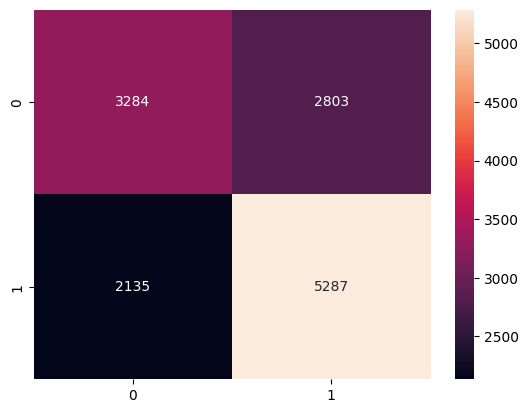

In [24]:
sns.heatmap(c_matrix, annot=True, fmt='d')

Obtenemos nuestros datos para medir la efectividad del modelo y que tan bien está resultando segun el entrenamiento realizado, mediante el recall, precision, f1-score y support.

Precicion:

Para "Venenosos": 0.61, lo que significa que el 61% de los casos clasificados como venenosos realmente lo eran.
Para "No venenosos": 0.65, es decir, el 65% de los casos clasificados como no venenosos eran correctos.

Recall:

Para "Venenosos": 0.54, lo que indica que el modelo detectó correctamente el 54% de todos los venenosos reales.
Para "No venenosos": 0.71, significando que el modelo detectó correctamente el 71% de los no venenosos reales

f1-score:

Para "Venenosos": 0.57, un equilibrio moderado entre precisión y recall.
Para "No venenosos": 0.68, lo que refleja mejor rendimiento en esta clase.

Con una precisión general del 63%, el modelo tiene un rendimiento moderado, identificando mejor los "No venenosos" que los "Venenosos". Esto sugiere que el modelo podría necesitar ajustes, como reentrenamiento o ajuste de hiperparámetros, para mejorar la detección de ambas clases.


In [25]:
target_names = ['Venenosos', 'No venenosos']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Venenosos       0.61      0.54      0.57      6087
No venenosos       0.65      0.71      0.68      7422

    accuracy                           0.63     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.63      0.63      0.63     13509



Ahora usamos el siguiente codigo:

Este código calcula y visualiza la Curva ROC (Receiver Operating Characteristic) y el AUC (Area Under the Curve) para evaluar el rendimiento del modelo de clasificación. La curva ROC y el AUC son útiles para entender el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos a distintos umbrales de decisión. A continuación, explico cada parte del código:

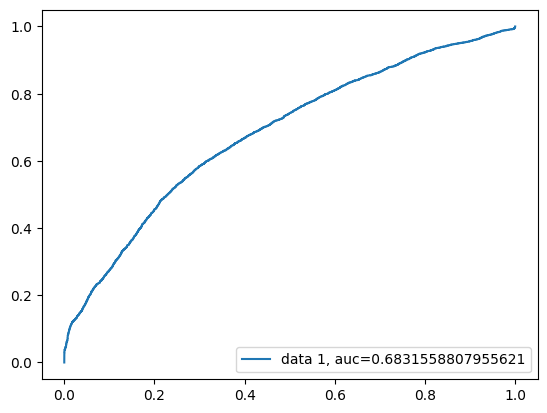

In [26]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Graficamos la dispercion con sus fronteras de decisión para ver de mejor manera los resultados obtenidos

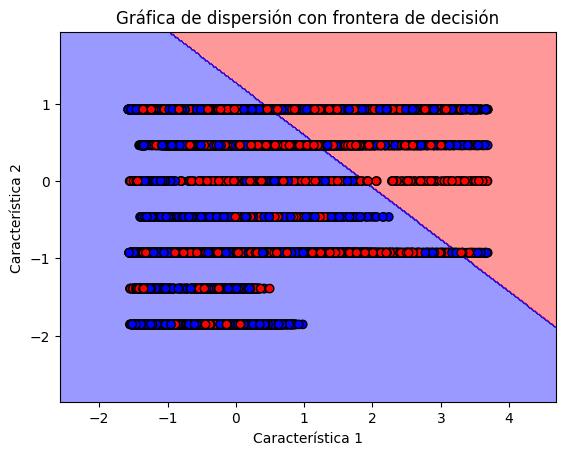

In [27]:
feature1_index = 0
feature2_index = 1

x_min, x_max = X_train[:, feature1_index].min() - 1, X_train[:, feature1_index].max() + 1
y_min, y_max = X_train[:, feature2_index].min() - 1, X_train[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


X_grid = np.zeros((xx.ravel().shape[0], 8))
X_grid[:, feature1_index] = xx.ravel()
X_grid[:, feature2_index] = yy.ravel()

for i in range(8):
    if i != feature1_index and i != feature2_index:
        X_grid[:, i] = X_train[:, i].mean()

Z = logreg.predict(X_grid)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X_train[:, feature1_index], X_train[:, feature2_index], c=y_train, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfica de dispersión con frontera de decisión')
plt.show()


Realizamos una nueva prediccion entregando ciertos parametros de las variables dependientes para ver que resultado nos entrega si es venenoso o no.

In [28]:
# Crear un nuevo hongo con características específicas
new_mushroom = np.array([[1320,3,2,10,3.68,1565,11,1.8]])

# Escalar las características del nuevo hongo usando el mismo scaler que para los datos de entrenamiento
new_mushroom_scaled = scaler.transform(new_mushroom)

# Predecir la clase del nuevo hongo usando el modelo entrenado
prediction = logreg.predict(new_mushroom_scaled)

# Mostrar el resultado de la predicción
if prediction[0] == 1:
  print("El hongo es probablemente venenoso.\n\n ")
else:
  print("El hongo es probablemente no venenoso.\n\n " )


El hongo es probablemente venenoso.

 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Implementación de una red neuronal MLP para la clasificación

In [29]:
# Crear el modelo MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Entrenar la red neuronal
mlp_model.fit(X_train, y_train)

# Realizar predicciones
mlp_predictions = mlp_model.predict(X_test)

# Evaluar el modelo
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_report = classification_report(y_test, mlp_predictions)

print('Accuracy de la red neuronal MLP:', mlp_accuracy)
print('Reporte de clasificación para la red neuronal MLP:\n', mlp_report)

Accuracy de la red neuronal MLP: 0.9800873491746244
Reporte de clasificación para la red neuronal MLP:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      6087
           1       0.98      0.98      0.98      7422

    accuracy                           0.98     13509
   macro avg       0.98      0.98      0.98     13509
weighted avg       0.98      0.98      0.98     13509



## Comparación entre el algoritmo inicial y la red neuronal MLP

                Modelo  Accuracy
0  Regresión Logística  0.634466
1     Red Neuronal MLP  0.980087


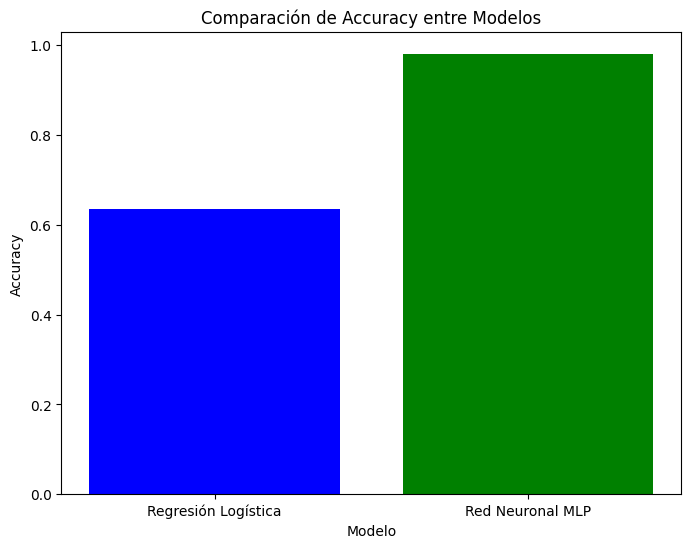

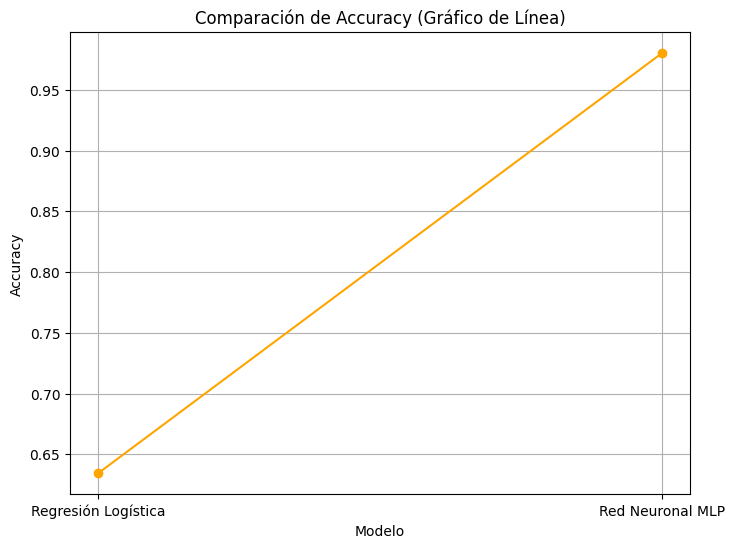

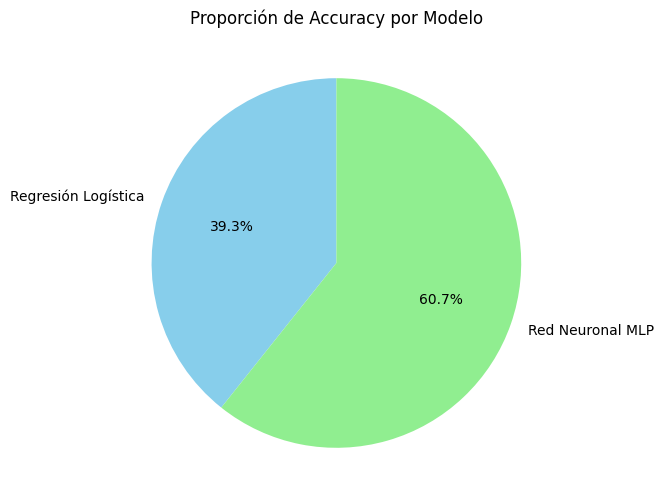

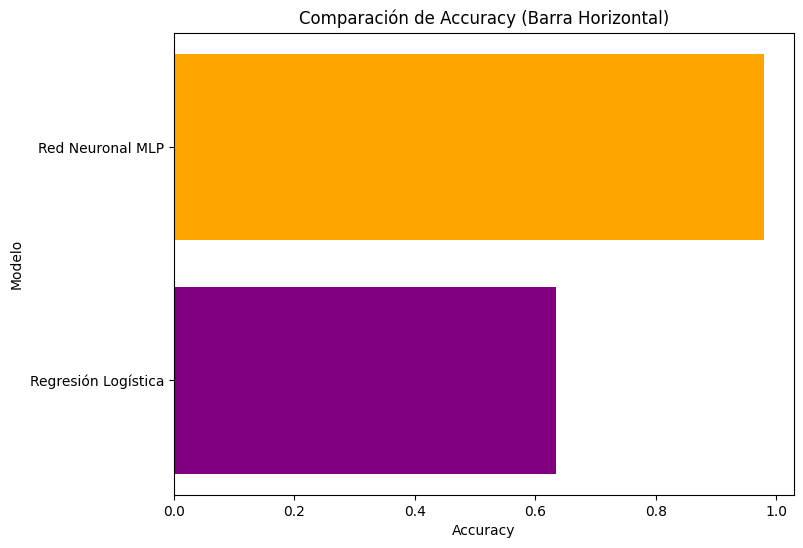

In [30]:

# Crear un DataFrame para almacenar los resultados de ambos modelos
comparison_df = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Red Neuronal MLP'],
    'Accuracy': [accuracy_score(y_test, y_pred), mlp_accuracy]
})

# Mostrar la comparación de accuracy
print(comparison_df)


# Gráfico de Barras
plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Modelo'], comparison_df['Accuracy'], color=['blue', 'green'])
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos')
plt.show()

# Gráfico de Línea
plt.figure(figsize=(8, 6))
plt.plot(comparison_df['Modelo'], comparison_df['Accuracy'], marker='o', linestyle='-', color='orange')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy (Gráfico de Línea)')
plt.grid(True)
plt.show()

# Gráfico de Pastel
plt.figure(figsize=(8, 6))
plt.pie(comparison_df['Accuracy'], labels=comparison_df['Modelo'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proporción de Accuracy por Modelo')
plt.show()

# Gráfico de Barras Horizontales
plt.figure(figsize=(8, 6))
plt.barh(comparison_df['Modelo'], comparison_df['Accuracy'], color=['purple', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
plt.title('Comparación de Accuracy (Barra Horizontal)')
plt.show()




In [31]:

print('Matriz de confusión para la Regresión Logística:\n', metrics.confusion_matrix(y_test, y_pred))
print('Matriz de confusión para la Red Neuronal MLP:\n', metrics.confusion_matrix(y_test, mlp_predictions))

Matriz de confusión para la Regresión Logística:
 [[3284 2803]
 [2135 5287]]
Matriz de confusión para la Red Neuronal MLP:
 [[5933  154]
 [ 115 7307]]


## 1. ¿Qué modelo tuvo mejor precisión?

Basado en el `comparison_df` impreso al final del código, la **Red Neuronal MLP** tiene una precisión ligeramente mejor que el modelo de Regresión Logística.

---

## 2. ¿Qué modelo tuvo mejor rendimiento en la clasificación de cada clase?

Para determinar qué modelo tiene mejor rendimiento en cada clase, debemos examinar los reportes de clasificación de ambos modelos. El código imprime un reporte de clasificación tanto para Regresión Logística como para MLP. Busca las métricas de precisión, recall y F1-score para cada clase ("Venenosos" y "No venenosos"). El modelo con mejores puntajes generales (precisión, recall, F1-score) en ambas clases generalmente tiene un mejor rendimiento en la clasificación.

---

## 3. ¿Qué modelo es más complejo?

La **Red Neuronal MLP** es significativamente más compleja que el modelo de Regresión Logística. Aquí está el porqué:

- **Regresión Logística:** Es un modelo lineal relativamente simple con menos parámetros para aprender.
- **MLP:** Es un modelo no lineal con múltiples capas ocultas y, potencialmente, muchos más parámetros. Puede aprender patrones más complejos en los datos, pero requiere más datos y recursos computacionales para entrenarse de manera efectiva.

---

## 4. ¿Qué modelo es más interpretable?

La **Regresión Logística** es más interpretable que la MLP.

- **Regresión Logística:** Los coeficientes aprendidos por el modelo pueden analizarse para entender el impacto de cada característica en la predicción. Esto facilita entender cómo el modelo toma decisiones.
- **MLP:** Es más difícil entender el razonamiento detrás de las predicciones hechas por una MLP. El modelo aprende relaciones no lineales complejas, lo que dificulta interpretar la contribución de características individuales.

---

## 5. ¿Qué modelo es más adecuado para el problema en cuestión?

Esto depende de tus prioridades:

- **Si la interpretabilidad y la simplicidad son cruciales:** La **Regresión Logística** es probablemente más adecuada.
- **Si la precisión es el objetivo principal, y tienes suficientes datos para entrenar un modelo más complejo:** La **MLP** podría ser una mejor opción.

**En este caso específico, la MLP parece tener una precisión ligeramente mejor, pero la diferencia puede no ser sustancial.** La elección del mejor modelo también depende de factores como la cantidad de datos disponibles, el nivel de interpretabilidad requerido y los recursos computacionales que tienes.


# Diferencia entre un algoritmo de machine learning y una red neuronal MLP:
### Algoritmos de Machine Learning:

## Ejemplo en el notebook: Regresión Logística.
Son métodos tradicionales que buscan patrones en los datos para realizar predicciones. En el caso de la regresión logística, se utiliza para tareas de clasificación binaria al modelar la probabilidad de que una instancia pertenezca a una clase.
### Características:
Matemáticamente explicables y más interpretables.
Generalmente eficientes en datasets pequeños o medianos.
Menos flexibles para problemas complejos como reconocimiento de imágenes.

## Red Neuronal MLP (Multilayer Perceptron):

Es un tipo de red neuronal artificial diseñado para aprender funciones complejas y no lineales.
### Compuesto por:
#### Capa de entrada: Donde se reciben los datos.
#### Capas ocultas: Transforman los datos para capturar patrones más complejos.
#### Capa de salida: Genera las predicciones.
### Ventajas:
Capacidad de modelar relaciones complejas.
Escalabilidad a grandes cantidades de datos.
### Limitaciones:
Mayor complejidad computacional.
Necesidad de ajuste cuidadoso de hiperparámetros.

## Arquitectura del Modelo MLP

### Estructura:
- **Entrada:** Datos preprocesados y escalados.
- **Capas ocultas:**
  - 1 capa oculta con **100 neuronas**.
- **Capa de salida:** Adaptada automáticamente para la clasificación (determinada por el número de clases en los datos).

### Parámetros de configuración:
- **`hidden_layer_sizes=(100,)`:** Define una sola capa oculta con 100 neuronas.
- **`max_iter=500`:** Máximo de 500 iteraciones durante el entrenamiento.
- **`random_state=42`:** Fija una semilla para garantizar la reproducibilidad.
- **Optimizador:** El MLP utiliza de manera predeterminada un optimizador basado en Gradiente Descendente Estocástico con ajustes como la retropropagación.

### Flujo del modelo:
1. **Entrenamiento:**
   - El modelo se ajusta a los datos de entrenamiento usando la función `fit(X_train, y_train)`.
2. **Predicción:**
   - Genera predicciones sobre datos de prueba con la función `predict(X_test)`.
3. **Evaluación:**
   - Calcula métricas como precisión y reporte de clasificación (`accuracy_score`, `classification_report`).

### Resumen:
El modelo MLP diseñado es adecuado para tareas de clasificación binaria o multiclase, dependiendo de los datos utilizados. La capa oculta con 100 neuronas permite capturar relaciones no lineales y complejas en los datos.
